In [1]:
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2 import model_zoo

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]


In [2]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("_train", {}, "./train/_annotations.coco.json", "./train")
register_coco_instances("_val", {}, "/valid/_annotations.coco.json", "./valid")
register_coco_instances("_test", {}, "./test/_annotations.coco.json", "./test")

In [3]:
from detectron2.data import MetadataCatalog
MetadataCatalog.get("_train").thing_classes = ["sigal", "stray", "target"]
MetadataCatalog.get("_val").thing_classes = ["sigal", "stray", "target"]
MetadataCatalog.get("_test").thing_classes = ["sigal", "stray", "target"]

In [8]:
class Detector:
    def __init__(self, model_type="OD") -> None:
        self.cfg = get_cfg()
        if model_type == "OD":
            self.cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
            # self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_C4_3x.yaml")
            self.cfg.MODEL.WEIGHTS = "./output/model_final.pth"
            self.cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3

        elif model_type == "IS":
            self.cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
            self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

        self.cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
        self.cfg.MODEL.DEVICE = "cpu"
        self.cfg.DATASETS.TRAIN = ("_train",)
        self.cfg.DATASETS.TEST = ("_val",)


        self.predictor = DefaultPredictor(self.cfg)


    def onImage(self, imagePath):
        image = cv2.imread(imagePath)
        predictions = self.predictor(image)
        print(predictions['instances'])
        category_id = predictions['instances'].get("pred_classes").numpy()
#         if 1 in category_id:
#             return
        viz = Visualizer(image[:,:,::-1],
                         metadata=MetadataCatalog.get("_train"),
        instance_mode=ColorMode.IMAGE)

        output = viz.draw_instance_predictions(predictions["instances"].to("cpu"))
#         print(predictions["instances"].to("cpu"))

#         cv2.imshow("", output.get_image()[:,:,::-1])
        plt.imshow(cv2.cvtColor(output.get_image()[...,::-1], cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
#         plt.savefig('foo.png', dpi=100, bbox_inches='tight', pad_inches=0.0)
#         plt.imshow(output.get_image()[...,::-1])
#         cv2.waitKey(500)
        plt.show()

In [9]:
detector = Detector(model_type="OD")

The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


Instances(num_instances=0, image_height=398, image_width=700, fields=[pred_boxes: Boxes(tensor([], size=(0, 4))), scores: tensor([]), pred_classes: tensor([], dtype=torch.int64)])


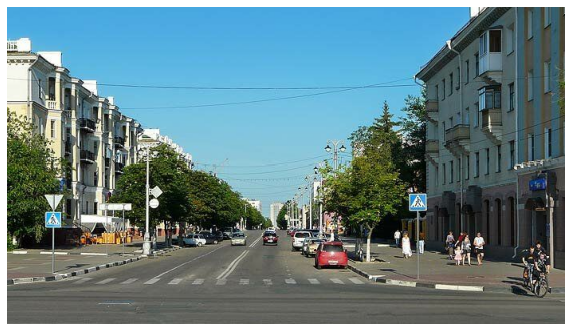

Instances(num_instances=1, image_height=288, image_width=307, fields=[pred_boxes: Boxes(tensor([[156.7903, 108.2336, 166.1440, 195.4662]])), scores: tensor([0.9741]), pred_classes: tensor([2])])


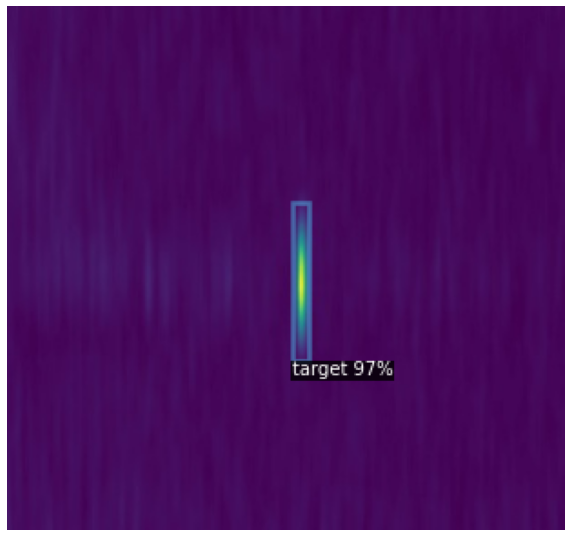

Instances(num_instances=1, image_height=224, image_width=224, fields=[pred_boxes: Boxes(tensor([[ 55.6145, 151.1685,  62.2966, 191.3893]])), scores: tensor([0.7979]), pred_classes: tensor([1])])


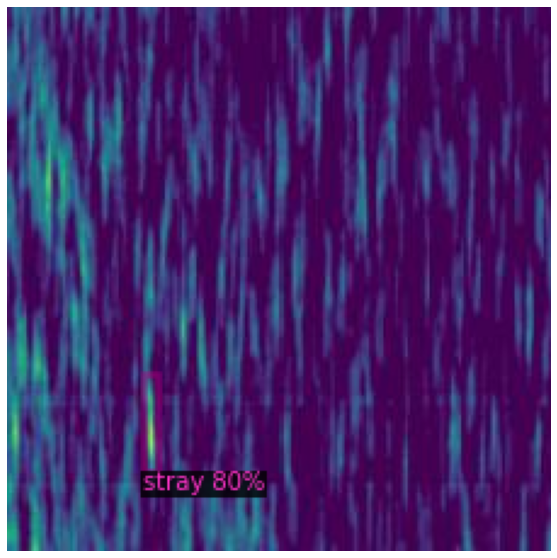

In [ ]:
for i in range(1, 6):
    detector.onImage(f"images/{i}.jpg")
# detector.onImage("images/foo.png")
# print(MetadataCatalog.get(detector.cfg.DATASETS.TRAIN[0]))